In [1]:
# Standard modules
import pdb
import os
import os.path
import sys
import json
import shutil
import time
import logging
import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

sys.path.append('..')
from simstack import SimstackWrapper

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
path_ini_file = os.path.join("examples","cosmos.ini")
cosmos = SimstackWrapper(path_ini_file, stack_automatically=True)
cosmos.parse_results()

Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of Layers Stacking Simultaneously = 8
Number of 

In [5]:
wavelengths = list(cosmos.results_dict.keys())
print(wavelengths)

['spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850']


spire_psw
spire_plw
spire_pmw
scuba_850
spire_plw


/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_14115/528850053.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.set_yscale('log')


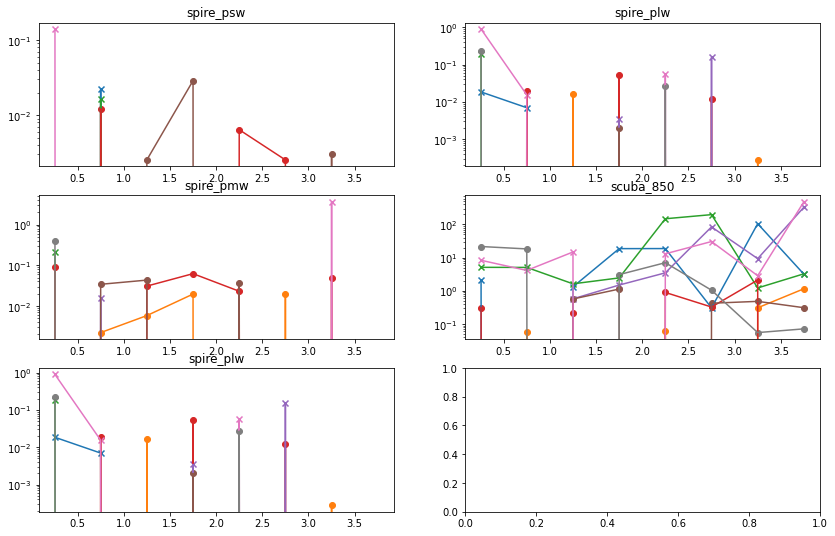

In [4]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

spire_psw
spire_plw
spire_pmw
scuba_850
spire_plw


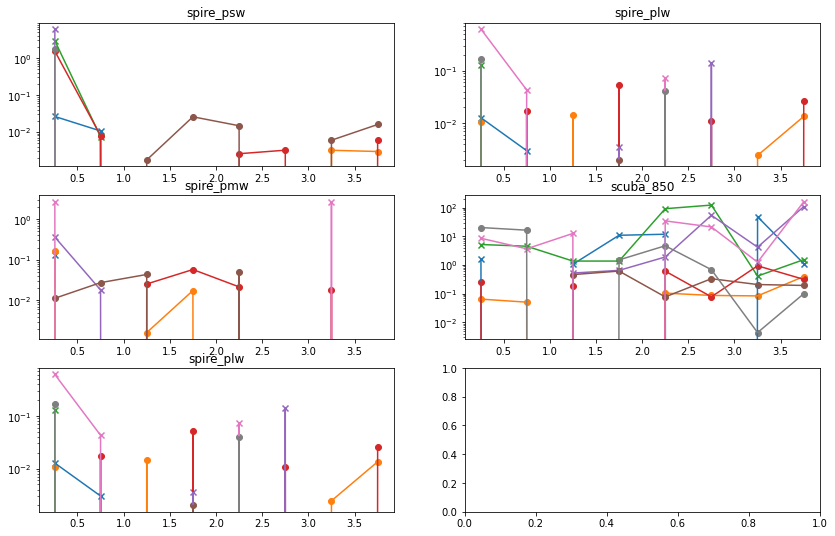

In [26]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [27]:
path_ini_file = os.path.join("examples","hers_hetdex.ini")
test_hetdex = SimstackWrapper(path_ini_file, stack_automatically=True)
test_hetdex.parse_results()

Catalog not found: /Users/marcoviero/data/Astronomy/catalogs/HETDEX/source_catalog_2.1.3.csv
> /Users/marcoviero/Repositories/simstack2/skycatalogs.py(24)import_catalog()
     22                         pdb.set_trace()
     23 
---> 24                 self.split_table_by_populations()
     25 
     26         def split_table_by_populations(self):

ipdb> exit


BdbQuit: 

In [7]:
test_hetdex.maps_dict['spire_plw']['stacked_flux_densities'].keys()

dict_keys(['redshift_0p1_1', 'redshift_1_2', 'redshift_2_3', 'redshift_3_4', 'redshift_4_6'])

In [8]:
results = test_hetdex.results_dict['spire_plw']['flux_density']
nps = np.shape(results)
print(nps)

(5, 3)


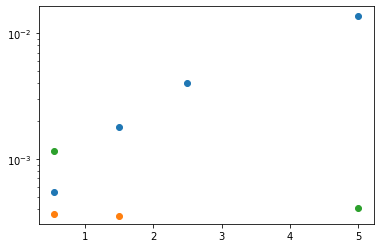

In [9]:
test_hetdex.parameter_names
split_dict = json.loads(test_hetdex.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
for i in range(nps[1]):
    plt.scatter(x, results[:,i])
    plt.yscale('log')

In [6]:
path_ini_file = os.path.join("examples","example.ini")
test_uvista = SimstackWrapper(path_ini_file, stack_automatically=True)
test_uvista.parse_results()

Number of Layers Stacking Simultaneously = 12
redshift_0p01_0p5__stellar_mass_8p5_9p0__pops_0
redshift_0p01_0p5__stellar_mass_8p5_9p0__pops_1
redshift_0p01_0p5__stellar_mass_9p0_9p5__pops_0
redshift_0p01_0p5__stellar_mass_9p0_9p5__pops_1
redshift_0p01_0p5__stellar_mass_9p5_10p0__pops_0
redshift_0p01_0p5__stellar_mass_9p5_10p0__pops_1
redshift_0p01_0p5__stellar_mass_10p0_10p5__pops_0
redshift_0p01_0p5__stellar_mass_10p0_10p5__pops_1
redshift_0p01_0p5__stellar_mass_10p5_11p0__pops_0
redshift_0p01_0p5__stellar_mass_10p5_11p0__pops_1
redshift_0p01_0p5__stellar_mass_11p0_12p0__pops_0
redshift_0p01_0p5__stellar_mass_11p0_12p0__pops_1
Number of Layers Stacking Simultaneously = 12
redshift_0p5_1p0__stellar_mass_8p5_9p0__pops_0
redshift_0p5_1p0__stellar_mass_8p5_9p0__pops_1
redshift_0p5_1p0__stellar_mass_9p0_9p5__pops_0
redshift_0p5_1p0__stellar_mass_9p0_9p5__pops_1
redshift_0p5_1p0__stellar_mass_9p5_10p0__pops_0
redshift_0p5_1p0__stellar_mass_9p5_10p0__pops_1
redshift_0p5_1p0__stellar_mass_10p

In [9]:
uvista_results = test_uvista.results_dict['spire_plw']['flux_density']
nps = np.shape(uvista_results)
print(nps)

(8, 6, 2)


In [7]:
test_uvista.maps_dict['spire_plw']['stacked_flux_densities']

{'redshift_0p01_0p5': <lmfit.minimizer.MinimizerResult at 0x2173b170dc0>,
 'redshift_0p5_1p0': <lmfit.minimizer.MinimizerResult at 0x217370751f0>,
 'redshift_1p0_1p5': <lmfit.minimizer.MinimizerResult at 0x2173b180ca0>,
 'redshift_1p5_2p0': <lmfit.minimizer.MinimizerResult at 0x2173b144ee0>,
 'redshift_2p0_2p5': <lmfit.minimizer.MinimizerResult at 0x2173b181880>,
 'redshift_2p5_3p0': <lmfit.minimizer.MinimizerResult at 0x2173b170c10>,
 'redshift_3p0_3p5': <lmfit.minimizer.MinimizerResult at 0x2173b181280>,
 'redshift_3p5_4p0': <lmfit.minimizer.MinimizerResult at 0x2173b170910>}

In [18]:
json.loads(json.loads(test_uvista.config_dict['catalog']['classification'])['redshift']['bins'])

[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

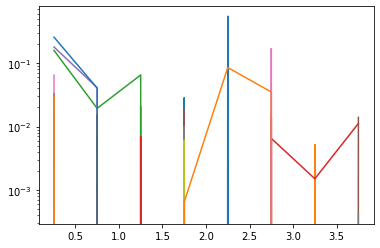

In [19]:
split_dict = json.loads(test_uvista.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
for i in range(nps[1]):
    for j in range(nps[2]):
        plt.plot(x, uvista_results[:,i,j]*1e3)
        plt.yscale ('log')

In [14]:
key = 'redshift_1p0_1p5'
test_uvista.maps_dict['spire_plw']['stacked_flux_densities'][key].params

name,value,standard error,relative error,initial value,min,max,vary
redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_0,-6.7229e-04,2.8897e-06,(0.43%),-0.00034128148862879625,-inf,inf,True
redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_1,2.0890e-05,8.7846e-08,(0.42%),-7.433786121485206e-06,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_0,6.4934e-05,9.6952e-07,(1.49%),0.0016745769502356572,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_1,6.9974e-06,8.6445e-08,(1.24%),0.0011028313089929982,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_0,-3.9916e-05,7.0893e-07,(1.78%),0.0006787935996712521,-inf,inf,True
redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_1,-1.7164e-05,1.0515e-07,(0.61%),-1.4242419677621057e-05,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_0,-1.3026e-04,6.3296e-07,(0.49%),0.001274608713260782,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_1,-7.9068e-05,2.3001e-07,(0.29%),0.0012451952900935691,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_0,-8.6952e-05,6.1701e-07,(0.71%),0.000124222072599132,-inf,inf,True
redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_1,-1.1707e-04,3.4383e-07,(0.29%),0.0008437409603862795,-inf,inf,True


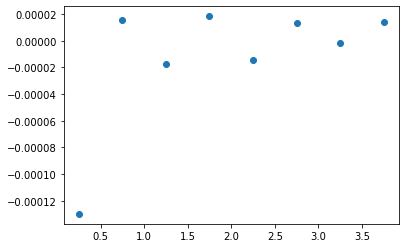

In [53]:
x

array([0.55, 1.5 , 2.5 , 3.5 , 4.5 , 5.5 ])

In [39]:
flux_density

[0.00036364386013441896,
 0.00041375502216667423,
 0.0002950844461433852,
 0.00018458649009391308,
 -8.367427002030895e-05,
 -0.0005145838158841628]

In [5]:
test_stack.split_table

,ra,dec,redshift,stellar_mass
0,34.347645,-0.898693,2.0,0.0
1,34.356080,-0.903736,3.0,0.0
2,34.356940,-0.894889,5.0,0.0
3,34.348330,-0.921676,2.0,0.0
4,34.382614,-0.794835,1.0,0.0
...,...,...,...,...
50780,13.849249,-0.328271,1.0,0.0
50781,19.643736,-0.160820,2.0,0.0
50782,13.537420,-0.319323,0.0,0.0
50783,22.692255,-0.133485,0.0,0.0
